In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

In [2]:
#Import datasets
GDP_df = pd.read_csv('Unit04 Global_GDP.csv')
Pop_df = pd.read_csv('Unit04 Global_Population.csv')

# Data Preparation
Pre-process the data – mean population of each country and mean per capita GDP (from 2001 to 2021) by making some arrangements for the missing values.

In [3]:
#EDA and data prep
# Sort ascending by country code
GDP_df.sort_values('Country Code', inplace=True)
Pop_df.sort_values('Country Code', inplace=True)

In [4]:
# Find values in the Country Code that appear more than once
duplicates_column = Pop_df[Pop_df['Country Code'].duplicated(keep=False)]

# Display the result
print(f"Duplicate values in column '{'Country Code'}':")
print(duplicates_column)

Duplicate values in column 'Country Code':
                                          Country Name Country Code  \
0                                                Aruba          ABW   
13                                               Aruba          ABW   
267                                                NaN          NaN   
268                                                NaN          NaN   
269                                                NaN          NaN   
270  Data from database: Population estimates and p...          NaN   
271                           Last Updated: 12/17/2021          NaN   

           Series Name  Series Code   1960   1961   1962   1963   1964   1965  \
0    Population, total  SP.POP.TOTL  54211  55438  56225  56695  57032  57360   
13   Population, total  SP.POP.TOTL  54208  55434  56234  56699  57029  57357   
267                NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN   
268                NaN          NaN    NaN    NaN    NaN    NaN 

In [5]:
#Aruba appears twice remove one of the values, index 0 contains NaN values so was selected to be removed
Pop_df = Pop_df.drop(Pop_df.index[0])

# Set 'Country Code' as the index
Pop_df.set_index('Country Code', inplace=True)
GDP_df.set_index('Country Code', inplace=True)

#Drop Rows at end of the index that contain only NaN values
Pop_df = Pop_df.drop(Pop_df.index[267:])


#Drop Columns for years before 2001
GDP_df.drop(GDP_df.loc[:, 'Country Name':'2000'], inplace=True, axis=1)
Pop_df.drop(Pop_df.loc[:, 'Country Name':'2000'], inplace=True, axis=1)

# Drop the '2021' column from Pop_df as that year is not in the GDP_df
Pop_df.drop('2021', axis=1, inplace=True)

In [6]:
#Check column types
print('####GDP_df####')
print(GDP_df.dtypes)
print('####Pop_df####')
print(Pop_df.dtypes)

####GDP_df####
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
dtype: object
####Pop_df####
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
2020    object
dtype: object


In [7]:
# Convert the columns to numeric, replacing non-numeric values with NaN
Pop_df = Pop_df.apply(pd.to_numeric, errors='coerce')
Pop_df.dtypes

2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
dtype: object

In [8]:
#Percentage of values missing
GDP_df.isnull().sum() / GDP_df.shape[0] * 100

#Each year is missing between 3-10% of values

2001    6.766917
2002    4.887218
2003    4.887218
2004    4.887218
2005    4.887218
2006    4.511278
2007    4.511278
2008    4.135338
2009    4.135338
2010    3.759398
2011    3.007519
2012    3.383459
2013    3.007519
2014    3.007519
2015    3.383459
2016    3.759398
2017    3.759398
2018    3.759398
2019    4.887218
2020    9.398496
dtype: float64

In [9]:
#Replace NA values with mean value for that year
GDP_df= GDP_df.fillna(GDP_df.mean())
Pop_df= Pop_df.fillna(Pop_df.mean())

In [20]:
#Find mean GDP_per_capita for each country for all years
# Calculate the GDP mean for each Countrys across all years
mean_GDP_per_Country = GDP_df.mean(axis=1)
# Calculate the mean population for each Countrys across all years
mean_pop_per_Country = Pop_df.mean(axis=1)

# Display the result
print("Mean of all years per country:")
print(mean_GDP_per_Country)

# Display the result
print("Mean population of all years per country:")
print(mean_pop_per_Country)

Mean of all years per country:
Country Code
ABW    2.906725e+11
AFE    7.441522e+11
AFG    6.471392e+10
AFW    5.570494e+11
AGO    7.868516e+10
           ...     
XKX    5.008561e+11
YEM    3.114042e+11
ZAF    3.280526e+11
ZMB    1.740083e+10
ZWE    1.253090e+10
Length: 266, dtype: float64
Mean population of all years per country:
Country Code
ABW    1.017625e+05
AFE    5.321282e+08
AFG    3.021299e+07
AFW    3.594714e+08
AGO    2.418655e+07
           ...     
XKX    1.760095e+06
YEM    2.363835e+07
ZAF    5.200136e+07
ZMB    1.410907e+07
ZWE    1.304740e+07
Length: 266, dtype: float64


In [21]:
#Create df containing these values
Country_df= pd.DataFrame({'Mean GDP': mean_GDP_per_Country, 'Mean Population': mean_pop_per_Country})

In [22]:
Country_df

,Mean GDP,Mean Population
Country Code,,
ABW,2.906725e+11,1.017625e+05
AFE,7.441522e+11,5.321282e+08
AFG,6.471392e+10,3.021299e+07
AFW,5.570494e+11,3.594714e+08
AGO,7.868516e+10,2.418655e+07
...,...,...
XKX,5.008561e+11,1.760095e+06
YEM,3.114042e+11,2.363835e+07
ZAF,3.280526e+11,5.200136e+07


# Task A: Correlation
Investigate any correlation between the mean population of each country and the mean per capita GDP (from 2001 to 2021). Very briefly, interpret the generated plot. Evaluate the Pearson Correlation Coefficient.

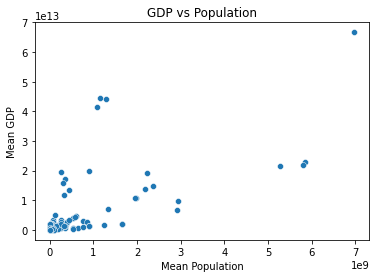

In [23]:
sns.scatterplot(x='Mean Population', y='Mean GDP', data= Country_df)
plt.xlabel('Mean Population')
plt.ylabel('Mean GDP')
plt.title('GDP vs Population')
plt.show()

Output shows a strong positive correlation between the mean GDP and mean population. Indicating that as mean GDP increases mean population also increases. 

In [24]:
Country_df.corr(method= 'pearson')

,Mean GDP,Mean Population
Mean GDP,1.000000,0.711381
Mean Population,0.711381,1.000000


A value of 0.92 shows a very strong positive correlation.

# Task B: Regression
Perform linear regression, where the independent variable is the mean population of each country (from 2001 to 2021) and dependent variable is mean per capita GDP (from 2001 to 2021). Be prepared to discuss your agreed results during the seminar session.

There will also be an opportunity to discuss your progress on the team project during the seminar.

In [25]:
#Create train and test data 
msk=np.random.rand(len(Country_df))<0.8
train=Country_df[msk]
test=Country_df[~msk]

In [26]:
#Train model
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Mean Population']])
train_y=np.asanyarray(train[['Mean GDP']])

#Fit model
regr.fit(train_x, train_y)
# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[5795.58079421]]
Intercept: [6.37809917e+11]


Text(0, 0.5, 'Mean GDP')

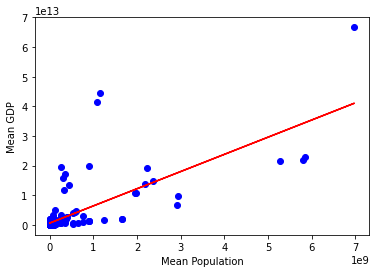

In [27]:
# Plot outputs
plt.scatter(train_x,train_y,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel("Mean Population")
plt.ylabel("Mean GDP")

A large portion of the points are significantly distant from the linear regression line showing that linear regression is a bad fit for this data and that there is significant variation and potentially outliers.

In [28]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['Mean Population']])
test_y=np.asanyarray(test[['Mean GDP']])
test_y_ = regr.predict(test_y)

In [29]:
#Mean Absolute Error (MAE): a measure of the average absolute differences between predicted and actual values.
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))

#Residual Sum of Squares (MSE): a measure of the average squared differences between predicted and actual values.
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-test_y)**2))

#R-squared (R2-score): measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
print("R2-score: %.2f" % r2_score(test_y_,test_y))

Mean absolute error: 7226970381986855.00
Residual sum of squares (MSE): 1255820565357505934742938969964544.00
R2-score: -0.04


The model shows a high amount of error suggesting that linear regression is not a good method for this data. 
R-squared values should fall between 0 and 1. Therefore R2-score of -0.04 is unusual and suggests that the model is not performing well. 